In [4]:
library(readxl)
library(dplyr)
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
customer_r <- read_excel("customer_r.xlsx")
reservation_r <- read_excel("reservation_r.xlsx")
order_info_r <- read_excel("order_info_r.xlsx")
item_r <- read_excel("item_r.xlsx")
colnames(customer_r) <- tolower(colnames(customer_r))
colnames(reservation_r) <- tolower(colnames(reservation_r))
colnames(order_info_r) <- tolower(colnames(order_info_r))
colnames(item_r) <- tolower(colnames(item_r))


In [7]:
df_cfm_order <- inner_join(reservation_r, order_info_r, by = "reserv_no") %>%
    select(customer_id, reserv_no, visitor_cnt, cancel, order_no, item_id, sales) %>%
arrange(customer_id, reserv_no, item_id)

In [9]:
df_sct_graph <- df_cfm_order %>%
    group_by(customer_id) %>%
    summarise(vst_cnt = sum(visitor_cnt), cust_amt = sum(sales/1000))

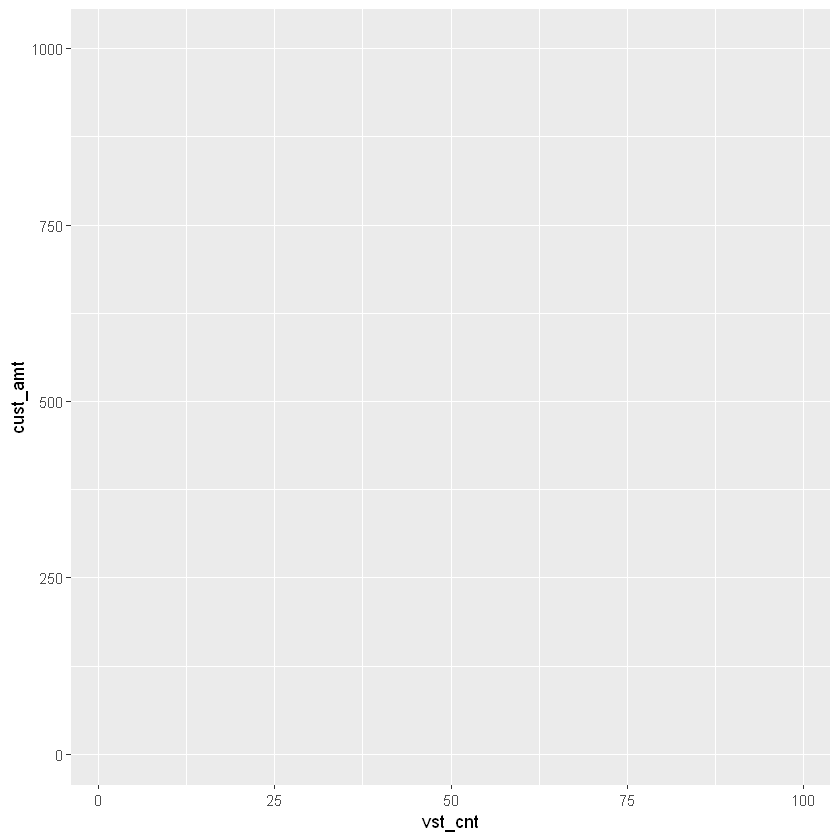

In [10]:
ggplot(data = df_sct_graph, aes(x = vst_cnt, y = cust_amt))

In [11]:
df_sct_graph2 <- inner_join(df_sct_graph, customer_r, by = "customer_id") %>%
    select(vst_cnt, cust_amt, sex_code)

Warning message:
"Removed 5 rows containing missing values (geom_point)."

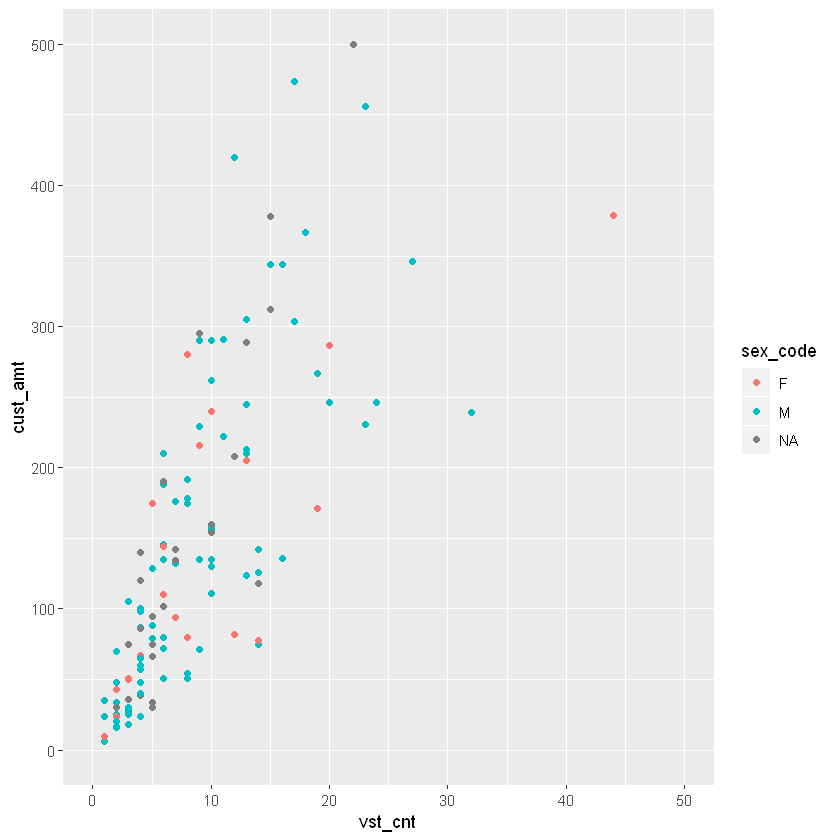

In [12]:
ggplot(data = df_sct_graph2, aes(x = vst_cnt, y = cust_amt, color = sex_code)) +
    geom_point() +
    xlim(0, 50) +
    ylim(0, 500)

In [14]:
df_branch_sales_1 <- inner_join(reservation_r, order_info_r, by = "reserv_no") %>%
    select(branch, sales) %>%
    arrange(branch, sales)

In [15]:
df_branch_sales_2 <- df_branch_sales_1 %>% group_by(branch) %>%
    summarise(amt = sum(sales) / 1000) %>%
    arrange(desc(amt))

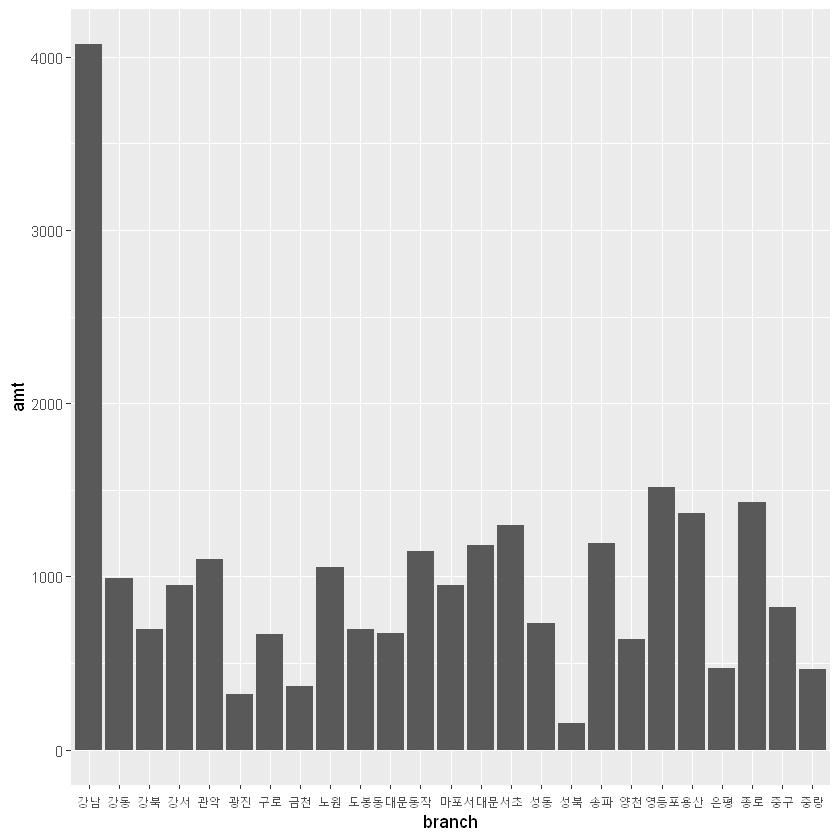

In [16]:
# 막대 그래프로 그리기
ggplot(df_branch_sales_2, aes(x = branch, y = amt)) + geom_bar(stat = "identity")

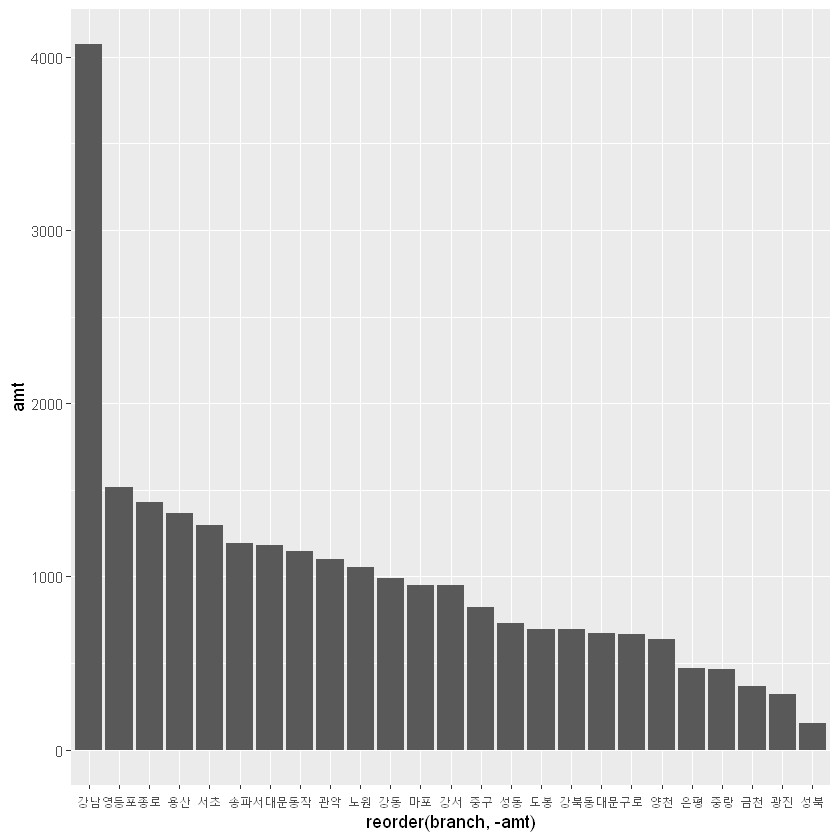

In [17]:
ggplot(df_branch_sales_2, aes(x = reorder(branch, -amt), y = amt)) +
    geom_bar(stat = "identity")

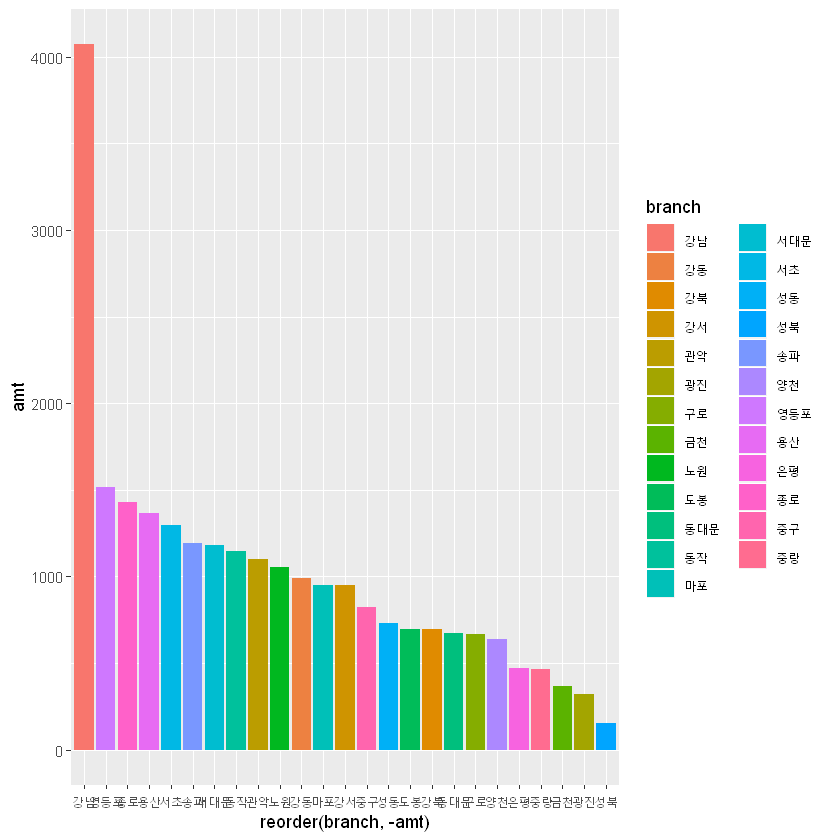

In [18]:
ggplot(df_branch_sales_2, aes(x = reorder(branch, -amt), y = amt, fill = branch)) +
    geom_bar(stat = "identity")

Warning message:
"Removed 19 rows containing missing values (position_stack)."

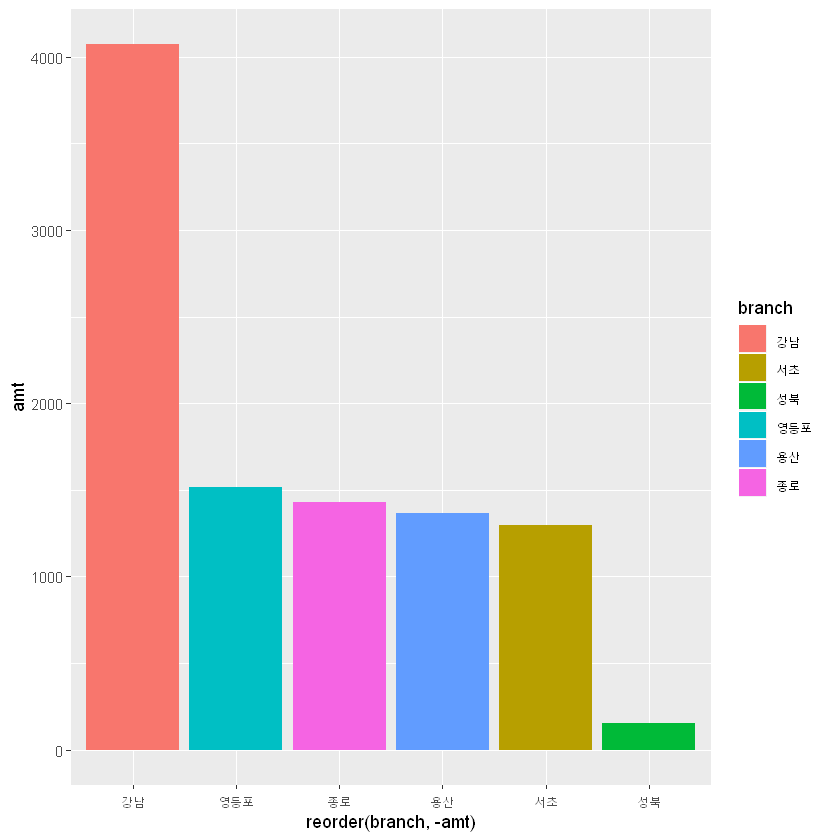

In [19]:
gg <- ggplot(df_branch_sales_2, aes(x = reorder(branch, -amt), y = amt, fill = branch)) +
    geom_bar(stat = "identity") +
    xlim(c("강남", "영등포", "종로", "용산", "서초", "성북"))
gg

Warning message:
"Removed 20 rows containing missing values (position_stack)."

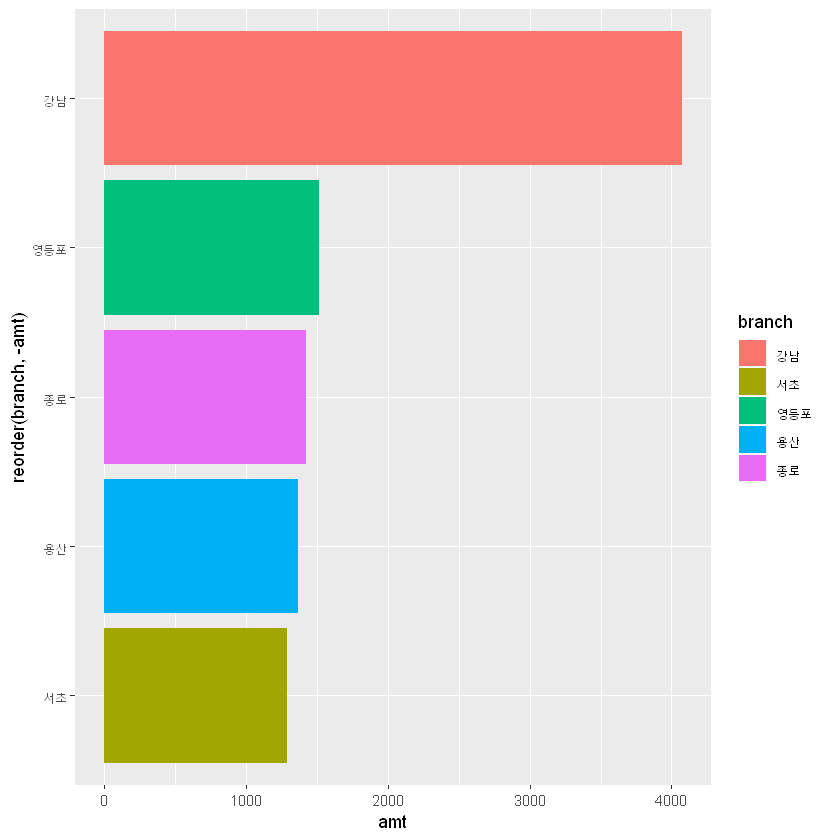

In [22]:
# 가로 막대 그래프 그리기
gg <- ggplot(df_branch_sales_2, aes(x = reorder(branch, -amt), y = amt, fill = branch)) +
    geom_bar(stat = "identity") +
    xlim(c("서초", "용산", "종로", "영등포", "강남"))

# x축과 y축을 바꿈
gg <- gg + coord_flip()
gg

Warning message:
"Removed 20 rows containing missing values (position_stack)."

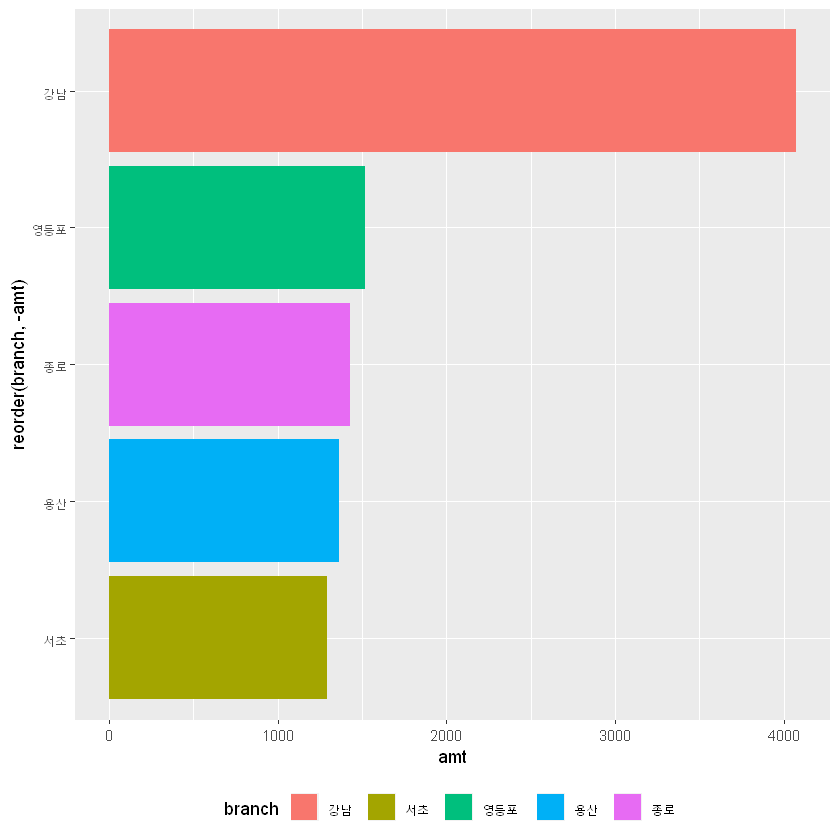

In [23]:
gg <- gg + theme(legend.position = "bottom")
gg

Warning message:
"Removed 20 rows containing missing values (position_stack)."

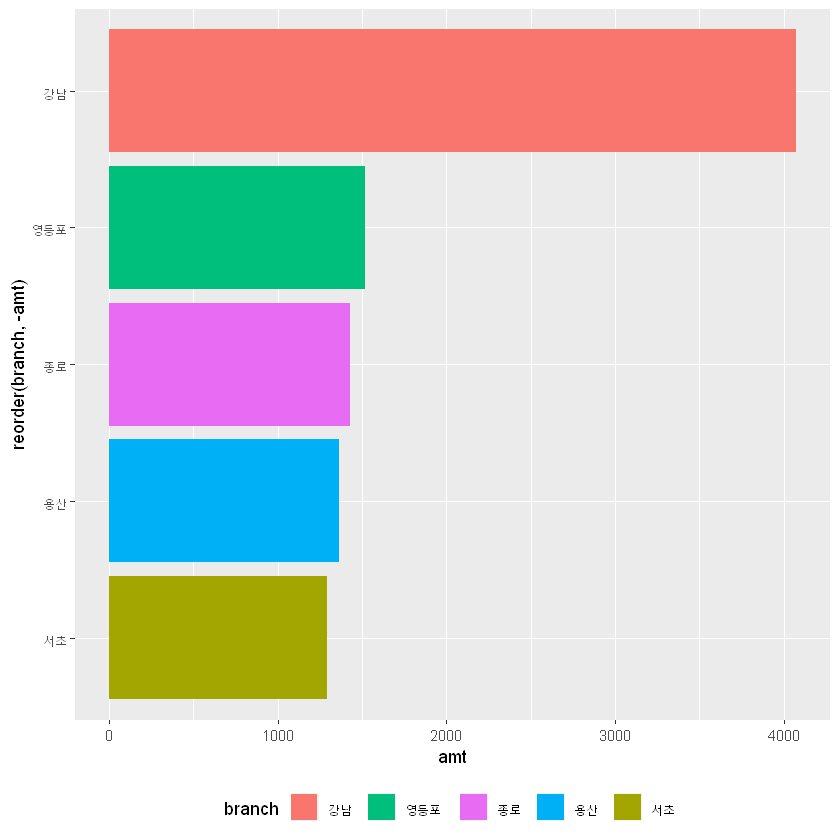

In [24]:
gg <- gg + scale_fill_discrete(breaks = c("강남", "영등포", "종로", "용산", "서초"))
gg

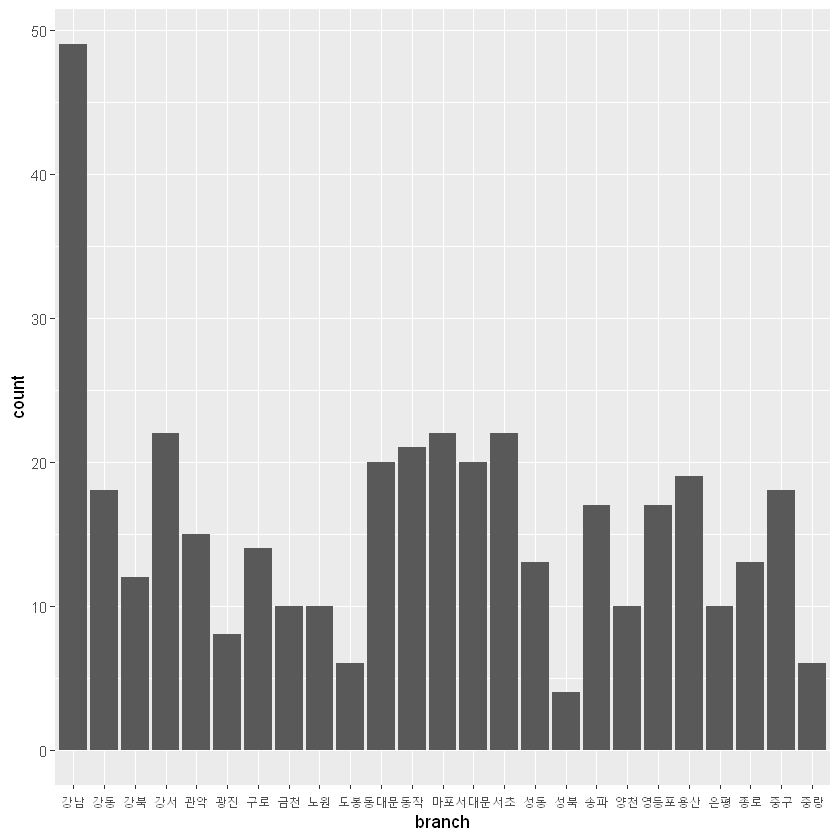

In [25]:
gg <- ggplot(data = reservation_r, aes(x = branch)) + geom_bar(stat = "count")
gg

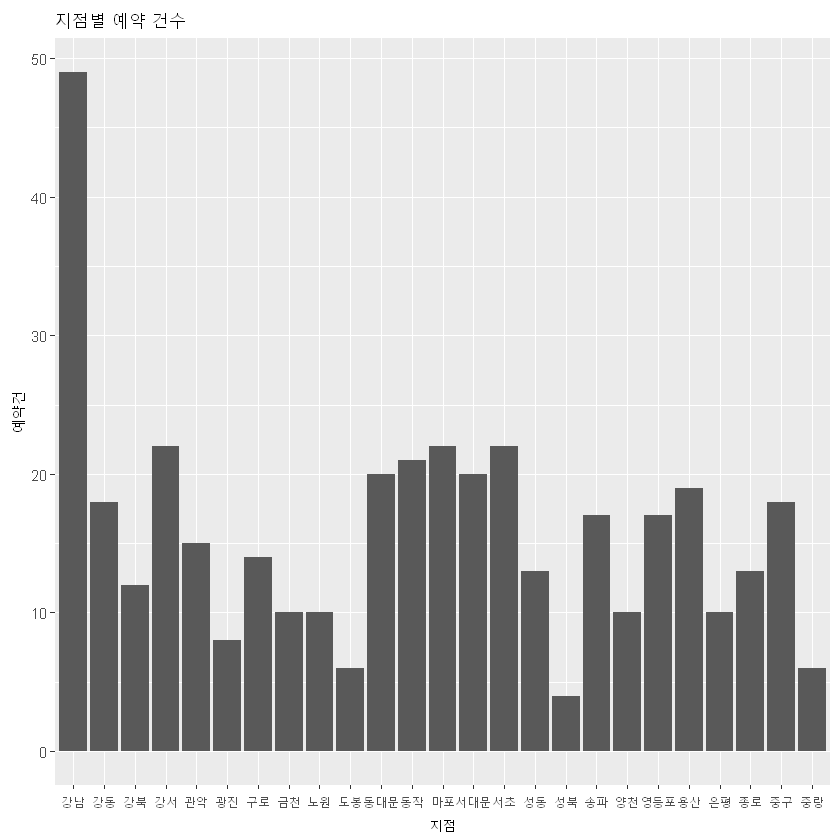

In [26]:
# x축과 y축 이름 바꾸기
gg <- gg + labs(title = "지점별 예약 건수", x = "지점", y = "예약건")
gg

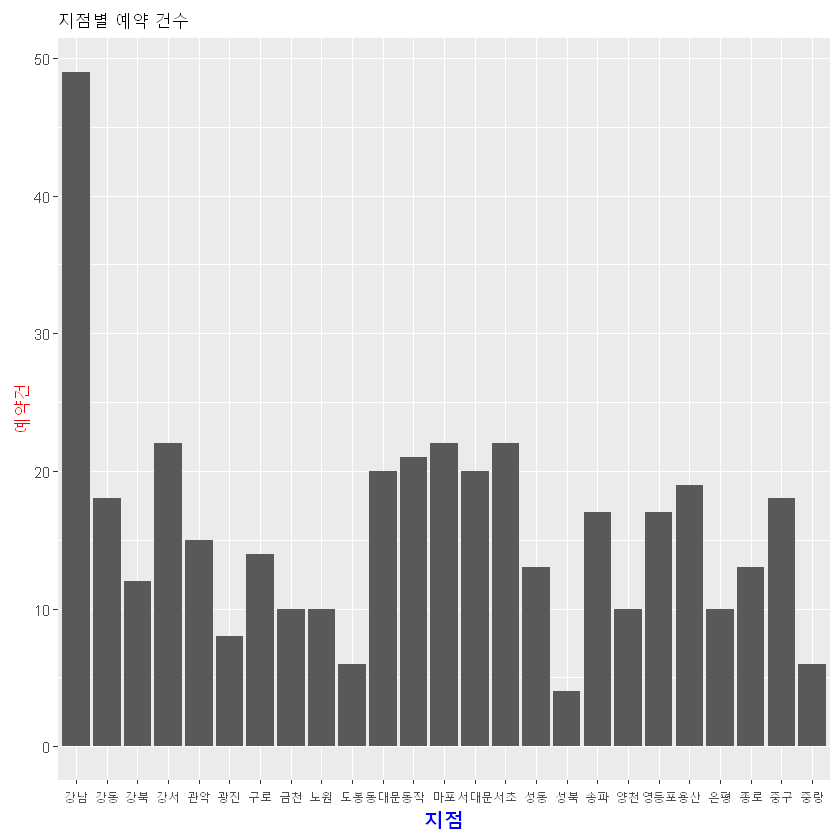

In [27]:
gg <- gg + theme(axis.title.x = element_text(size = 15,
                                             color = "blue",
                                             face = 'bold',
                                             angle = 0) ,
                 axis.title.y = element_text(size = 13,
                                             color = 'red',
                                             angle = 90)
                )

gg

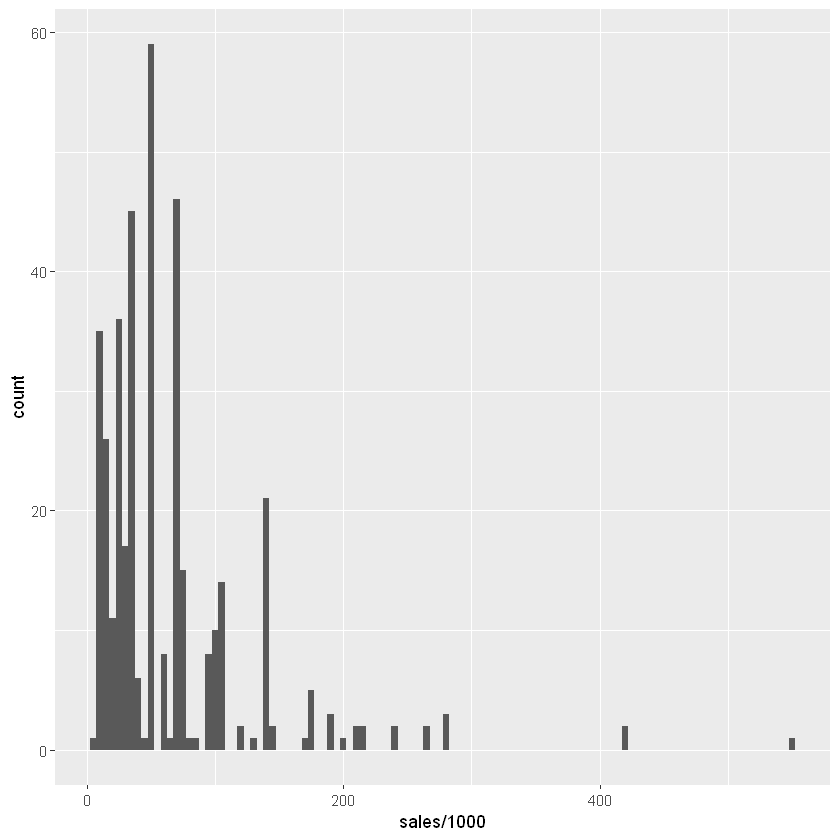

In [28]:
ggplot(data = order_info_r, aes(x = sales/1000)) + geom_histogram(binwidth = 5)

In [29]:
df_pie_graph <- inner_join(order_info_r, item_r, by = "item_id") %>%
    group_by(item_id, product_name) %>%
    summarise(amt_item = sum(sales/1000)) %>%
    select(item_id, amt_item, product_name)

df_pie_graph # 데이터셋 확인

item_id,amt_item,product_name
M0001,5808,SPECIAL_SET
M0002,1968,PASTA
M0003,1666,PIZZA
M0004,1625,SEA_FOOD
M0005,9380,STEAK
M0006,2075,SALAD_BAR
M0007,525,SALAD
M0008,610,SANDWICH
M0009,856,WINE
M0010,444,JUICE


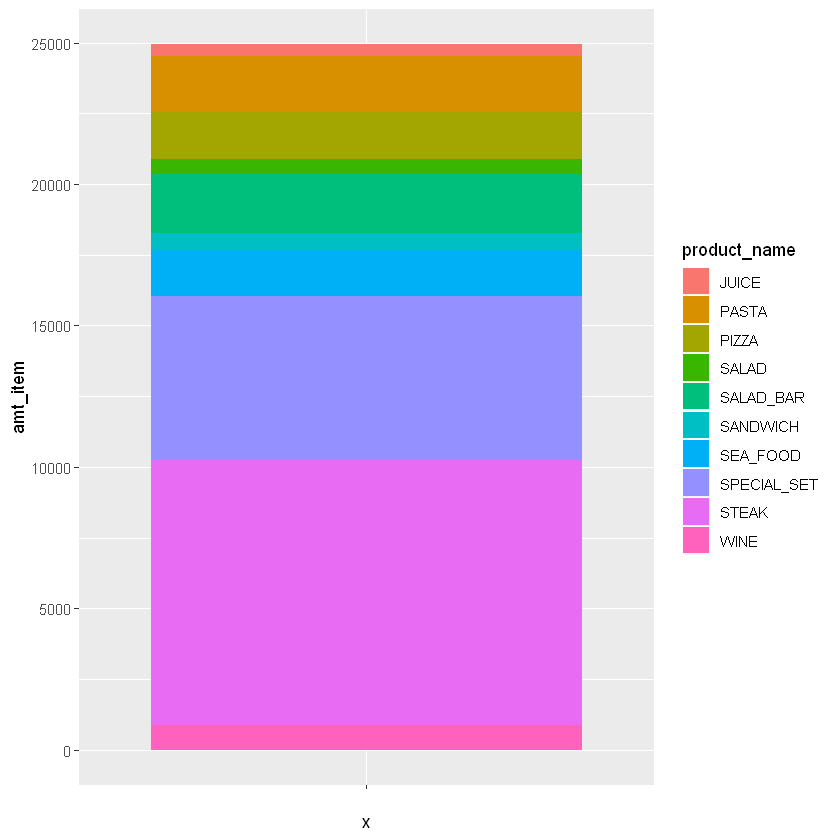

In [30]:
# 누적 막대 그래프로 그리기
ggplot(df_pie_graph, aes(x = "", y = amt_item, fill = product_name)) +
    geom_bar(stat = "identity")


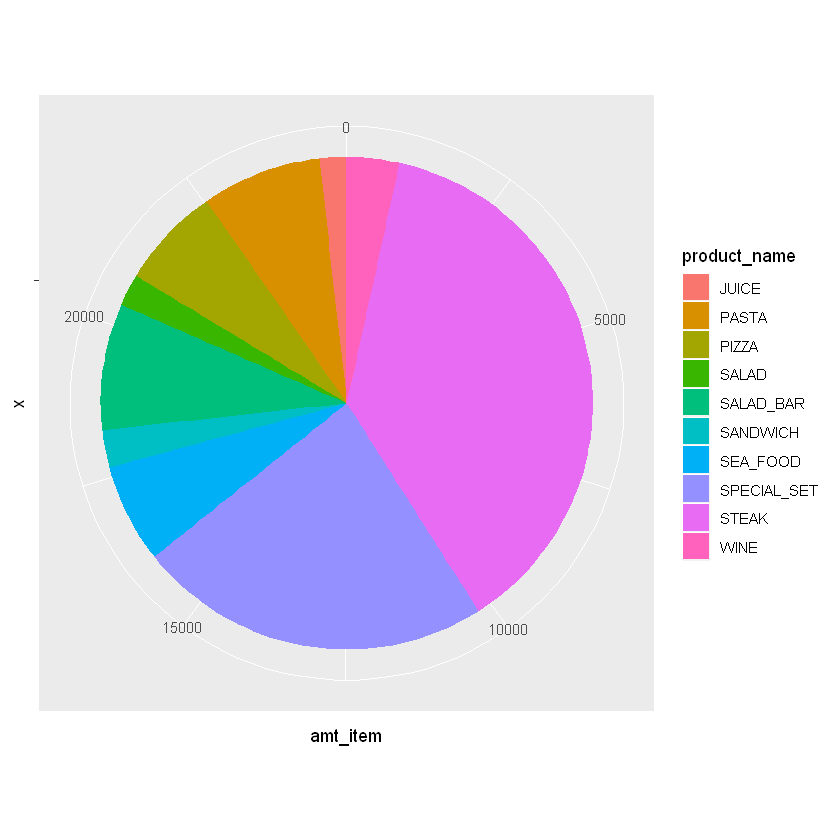

In [31]:
# 파이 차트 그리기
gg <- ggplot(df_pie_graph, aes(x = "", y = amt_item, fill = product_name)) +
    geom_bar(stat = "identity") +
    coord_polar("y", start = 0)

gg

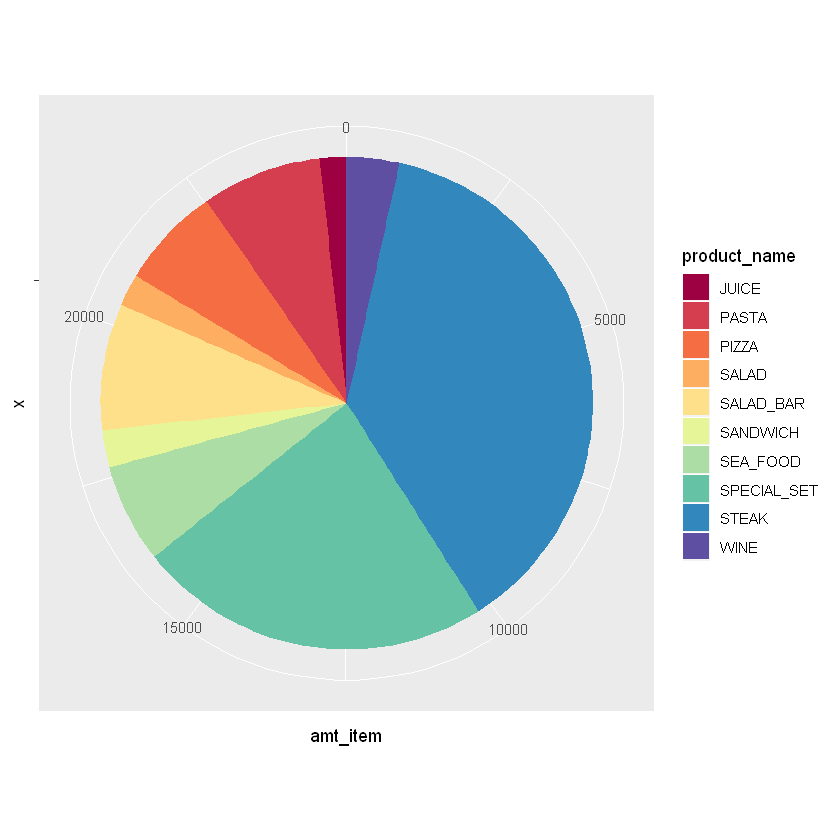

In [32]:
# Spectral 색상 팔레트로 채움, direction = -1을 적용하면 팔레트 순서가 바뀜
gg <- gg + scale_fill_brewer(palette = "Spectral")
gg

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.


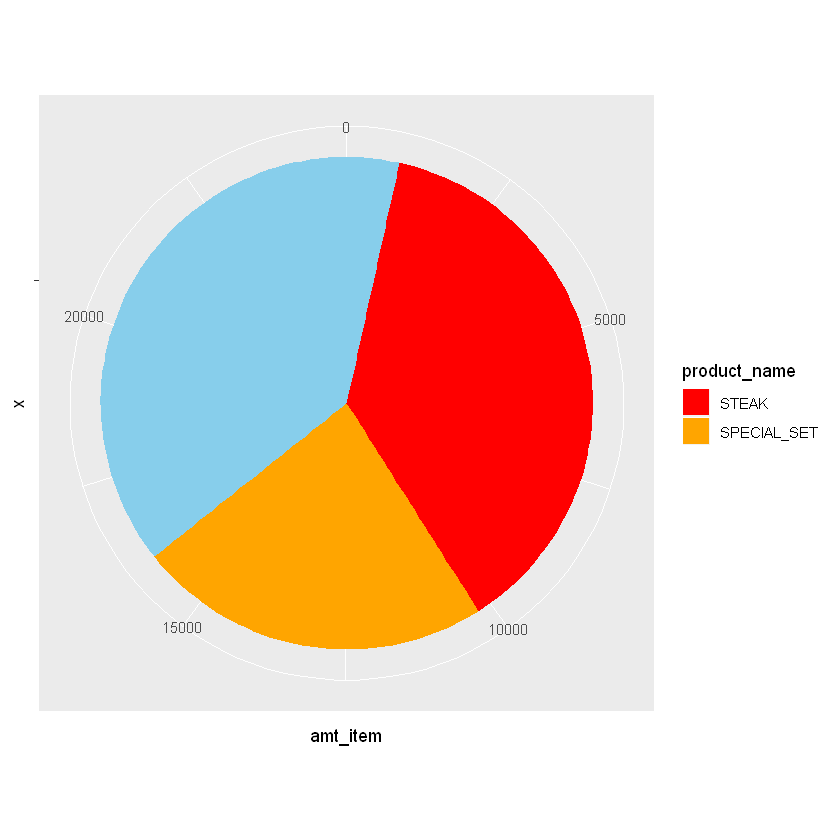

In [33]:
# 수동으로 색상을 채움
gg <- gg +
scale_fill_manual(values = c("STEAK" = "red", "SPECIAL_SET" = "orange", "SEA_FOOD" = "skyblue", "SANDWICH" = "skyblue", "SALAD_BAR" = "skyblue", "SALAD" = "skyblue", "PIZZA" = "skyblue", "PASTA" = "skyblue", "JUICE" = "skyblue", "WINE" = "skyblue"), breaks = c("STEAK", "SPECIAL_SET"))
gg

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Warning message in RColorBrewer::brewer.pal(n, pal):
"n too large, allowed maximum for palette Oranges is 9
Returning the palette you asked for with that many colors
"

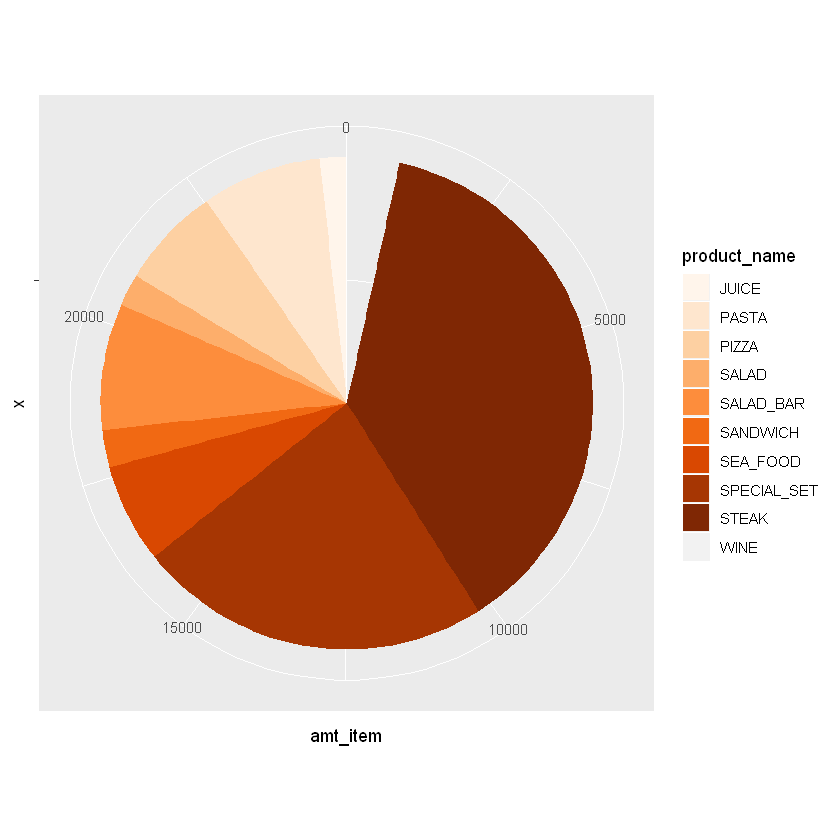

In [35]:
# Spectral 색상 팔레트로 채움, direction = -1을 적용하면 팔레트 순서가 바뀜
gg <- gg + scale_fill_brewer(palette = "Oranges")
gg